# Kapsel

In [43]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
np.random.seed(4072)
#sns.set()
plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

In [44]:
initial_infected_proba = 0.02
dim = 50
max_iter = 25

beta = 0.25
Tr = 5
tao = 800
eta = 0.25
k = 0.6
p = 0.8
alpha = 0.95
Q = 0.5

In [45]:
colors = ('#000000', '#2266E7', '#E72822', '#34E722')
disc_cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

In [46]:
matriks = np.ones([dim,dim])
matriks_border = np.zeros([dim+2,dim+2])

for i in range(1,dim+1):
    for j in range(1,dim+1):
        matriks_border[i][j] = matriks[i-1][j-1]

In [47]:
# Generate initial infected
for i in range(1,dim+1):
    for j in range(1, dim+1):
        r = np.random.uniform()
        if r > (1-initial_infected_proba):
            matriks_border[i][j] = 2

In [48]:
matriks_time = np.zeros([dim,dim])
matriks_time_border = np.ones([dim+2, dim+2])*-99999
for i in range(1,dim+1):
    for j in range(1,dim+1):
        matriks_time_border[i][j] = 0
matriks_time = matriks_time_border

In [49]:
plt.figure(figsize=(10,10))
list_of_matriks_border = []
matriks_border_next = matriks_border.copy()
matriks_time = np.zeros((dim+2, dim+2))
iteration = 0
sns.heatmap(matriks_border, cmap=disc_cmap, square=True, vmin=0, vmax=3)
plt.title('Hari ke-{}'.format(0),fontsize=20)
plt.savefig('foto/X_mat_{}.png'.format(iteration))
plt.clf()
plt.figure(figsize=(10,10))
for i in range(1,dim+1):
    for j in range(1,dim+1):
        if matriks_border[i][j] == 2:
            matriks_time[i][j] += 1
list_SIR_count = []
array_counter = np.array([0,0,0])
for i in range(0,3):
    array_counter[i] = np.count_nonzero(matriks_border == i+1)
list_SIR_count.append(array_counter.copy())
N = array_counter[1]    
print(f'iteration : {iteration} | N: {N}')

list_of_matriks_border.append(matriks_border.copy())

while iteration < max_iter:
    iteration += 1
    for i in range(1,dim+1):
        for j in range(1,dim+1): 
            if N >= tao:
                if matriks_border[i][j] == 1:
                    tetangga = [0,0,0,0]
                    connected = [0,0,0,0]
                    
                    if matriks_border[i-1][j] == 2:
                        tetangga[0] = 1
                        r = np.random.uniform()
                        if r > eta:
                            connected[0] = 1
                            
                    if matriks_border[i][j+1] == 2:
                        tetangga[1] = 1
                        r = np.random.uniform()
                        if r > eta:
                            connected[1] = 1
                            
                    if matriks_border[i+1][j] == 2:
                        tetangga[2] = 1
                        r = np.random.uniform()
                        if r > eta:
                            connected[2] = 1
                            
                    if matriks_border[i][j-1] == 2:
                        tetangga[3] = 1
                        r = np.random.uniform()
                        if r > eta:
                            connected[3] = 1
                    
                    for c in range(len(connected)):
                        if connected[c] == 1:
                            r = np.random.uniform()
                            if r <= beta:
                                matriks_border_next[i][j] = 2  
                                
            elif N < tao:
                if matriks_border[i][j+1] == 2 or matriks_border[i][j-1] == 2 or matriks_border[i-1][j] == 2 or matriks_border[i+1][j] == 2:
                    # jika dia susceptible
                    if matriks_border[i][j] ==  1:
                        r = np.random.uniform()
                        if r <= beta:
                            matriks_border_next[i][j] = 2
    
    for i in range(1,dim+1):
        for j in range(1,dim+1):
            if matriks_border_next[i][j] == 2:
                matriks_time[i][j] += 1
                
            if matriks_time[i][j] == Tr+1:
                matriks_border_next[i][j] = 3
    
    
    matriks_border = matriks_border_next
    list_of_matriks_border.append(matriks_border.copy())
    
    for i in range(0,3):
        array_counter[i] = np.count_nonzero(matriks_border == i+1)
    N = array_counter[1]
    list_SIR_count.append(array_counter.copy())
    
    print(f'iteration : {iteration} | N: {N}')
    
    #Save plot matriks X
    sns.heatmap(matriks_border, cmap=disc_cmap, square=True, vmin=0, vmax=3)
    plt.title('Hari ke-{}'.format(iteration),fontsize=20)
    plt.savefig('foto/X_mat_{}.png'.format(iteration))
    plt.clf()
    
    # Save plot matriks time
#     sns.heatmap(matriks_time, cmap="Reds", square=True, vmin=0, vmax=Tr+1)
#     plt.savefig('foto/Time_mat_{}.png'.format(iteration))
#     plt.clf()

iteration : 0 | N: 48
iteration : 1 | N: 88
iteration : 2 | N: 167
iteration : 3 | N: 265
iteration : 4 | N: 397
iteration : 5 | N: 491
iteration : 6 | N: 577
iteration : 7 | N: 643
iteration : 8 | N: 704
iteration : 9 | N: 749
iteration : 10 | N: 766
iteration : 11 | N: 803
iteration : 12 | N: 837
iteration : 13 | N: 828
iteration : 14 | N: 766
iteration : 15 | N: 694
iteration : 16 | N: 597
iteration : 17 | N: 467
iteration : 18 | N: 370
iteration : 19 | N: 294
iteration : 20 | N: 248
iteration : 21 | N: 201
iteration : 22 | N: 169
iteration : 23 | N: 148
iteration : 24 | N: 123
iteration : 25 | N: 102


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

# Social

In [50]:
def get_w(w_matriks, coor):
    list_w = []
    i,j = coor
    list_w.append(w_matriks[i][j])
    list_w.append(w_matriks[i-1][j])
    list_w.append(w_matriks[i][j+1])
    list_w.append(w_matriks[i+1][j])
    list_w.append(w_matriks[i][j-1])
    return list_w

In [51]:
def cek_tetangga(matriks, coor):
    q = Q
    list_i = []
    list_i.append(1)
    i, j = coor
    if matriks[i-1][j] != 0:
        r = np.random.uniform()
        if r <= q:
            list_i.append(1)
        else:
            list_i.append(0)
    else:
        list_i.append(0)
            
    if matriks[i][j+1] != 0:
        r = np.random.uniform()
        if r <= q:
            list_i.append(1)
        else:
            list_i.append(0)
    else:
        list_i.append(0)

    if matriks[i+1][j] != 0:
        r = np.random.uniform()
        if r <= q:
            list_i.append(1)
        else:
            list_i.append(0)
    else:
        list_i.append(0)
            
    if matriks[i][j-1] != 0:
        r = np.random.uniform()
        if r <= q:
            list_i.append(1)
        else:
            list_i.append(0)
    else:
        list_i.append(0)
        
    return list_i

In [52]:
plt.figure(figsize=(10,10))
iteration = 0

list_of_ymat = []
# Inisialisasi matriks Y dan M
Y_matriks = np.zeros([dim,dim])
Y_matriks_border = np.ones([dim+2,dim+2])*2

Y_matriks_dummy = np.zeros([dim,dim])
Y_matriks_border_dummy = np.ones([dim+2,dim+2])*2

M_matriks = np.zeros([dim,dim])
M_matriks_border = np.ones([dim+2,dim+2])*2

W_matriks = np.ones([dim,dim])
W_matriks_border = np.zeros([dim+2,dim+2])

for i in range(1,dim+1):
    for j in range(1,dim+1):
        Y_matriks_border[i][j] = Y_matriks[i-1][j-1]
        Y_matriks_border_dummy[i][j] = Y_matriks_dummy[i-1][j-1]
        M_matriks_border[i][j] = M_matriks[i-1][j-1]
        W_matriks_border[i][j] = W_matriks[i-1][j-1]
        
# Y_ij = k if X_ij == Infected
for i in range(1,dim+1):
    for j in range(1, dim+1):
        if list_of_matriks_border[0][i][j] == 2:
            Y_matriks_border[i][j] = k
        if Y_matriks_border[i][j] >= 0.5:
            W_matriks_border[i][j] = 10

N = list_SIR_count[0][1]

temp = []
for i in range(1,dim+1):
    for j in range(1,dim+1):
        temp.append(Y_matriks_border[i][j])
list_of_ymat.append(np.array(temp))

sns.heatmap(Y_matriks_border, cmap='Oranges', square=True, vmin=0, vmax=1)
plt.title('Hari ke-{}'.format(0),fontsize=20)
plt.savefig('foto/Y_mat_{}.png'.format(iteration))
# plt.show()
plt.clf()

plt.figure(figsize=(10,10))
while iteration < max_iter:
    iteration += 1
    N = list_SIR_count[iteration][1]
    if N > max([x[1] for x in list_SIR_count[:iteration]]):
        M = 2*k - 1
    else:
        M = 0
    
    # input M_i
    for i in range(1, dim+1):
        for j in range(1, dim+1):
            r = np.random.uniform()
            if r <= p:
                M_matriks_border[i][j] = M
            else:
                M_matriks_border[i][j] = 0
                
            list_tetangga = cek_tetangga(list_of_matriks_border[iteration], (i,j))
            list_bobot = get_w(W_matriks_border, (i,j))
            list_y = get_w(Y_matriks_border, (i,j))
            tetangga_bobot = np.array(list_tetangga)*np.array(list_bobot) 
            atas = np.dot(tetangga_bobot, np.array(list_y))
            bawah = np.dot(np.array(list_tetangga), np.array(list_bobot))
            Y_matriks_border_dummy[i][j] = np.tanh(M_matriks_border[i][j] + (atas/bawah))
    
    for i in range(1, dim+1):
        for j in range(1, dim+1):
#             alpha = np.random.uniform()
            Y_matriks_border[i][j] = alpha*Y_matriks_border_dummy[i][j]
    
    temp = []
    for i in range(1,dim+1):
        for j in range(1,dim+1):
            temp.append(Y_matriks_border[i][j])
    
    list_of_ymat.append(np.array(temp))
    
    sns.heatmap(Y_matriks_border, cmap='Oranges', square=True, vmin=0, vmax=1)
    plt.title('Hari ke-{}'.format(iteration),fontsize=20)
    plt.savefig('foto/Y_mat_{}.png'.format(iteration))
#     plt.show()
    plt.clf()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

# Plot Mean Social Response

In [53]:
mean_social_response = [x.mean() for x in list_of_ymat]

In [62]:
plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#00ff41',  # matrix green
#     '#F5D300',  # yellow
]

#gif
for i in range(len(mean_social_response)):    
    plt.plot(mean_social_response[:i+1], 'o-', color='#F5D300')
    plt.grid(color='#2A3459')
    plt.xlabel('Hari ke-{}'.format(i))
    plt.ylabel('Mean Social Response')
    plt.title('Plot Social Response Terhadap Waktu')
    plt.xlim(0,iteration)
    plt.ylim(0, max(mean_social_response)+0.1)
#     plt.show()
    plt.savefig(f'foto/mean_social_response_{i}.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

# Plot SIR

In [55]:
df_SIR = pd.DataFrame(np.array(list_SIR_count), columns = ['S','I','R'])

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


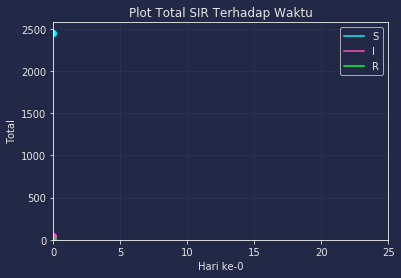

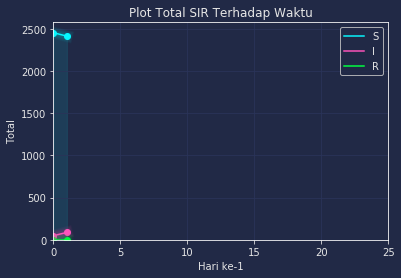

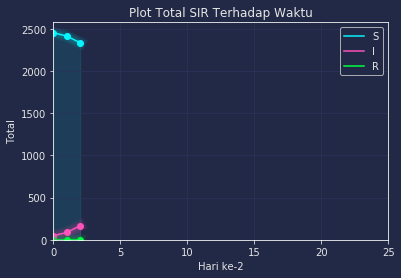

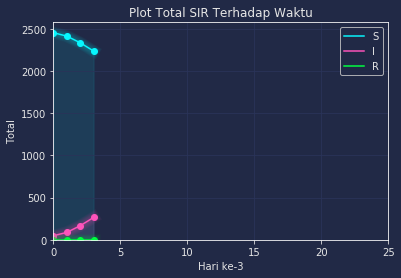

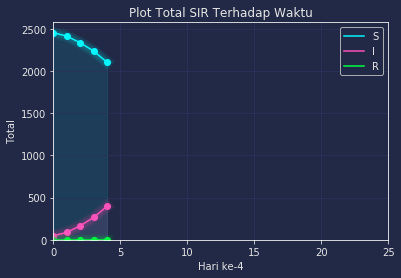

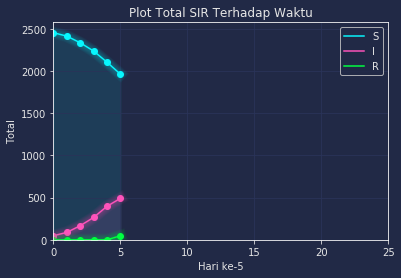

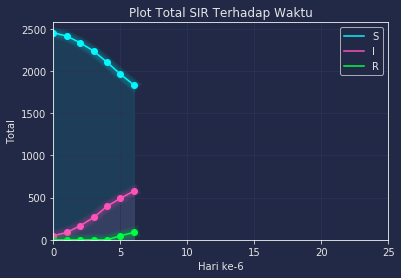

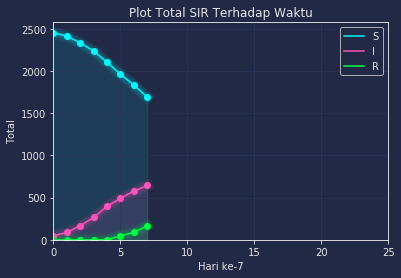

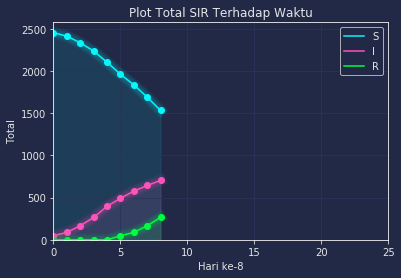

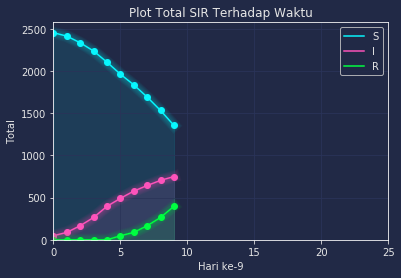

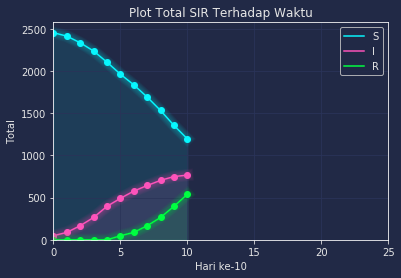

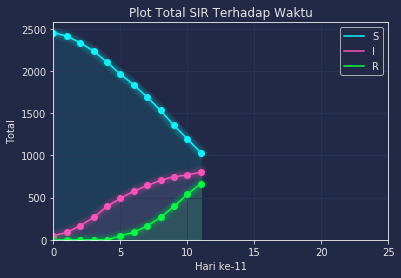

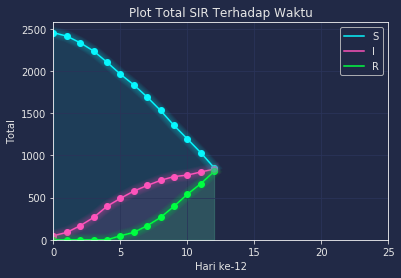

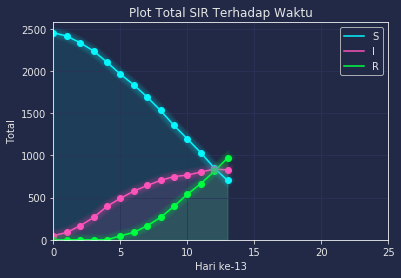

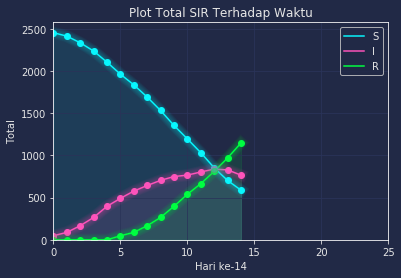

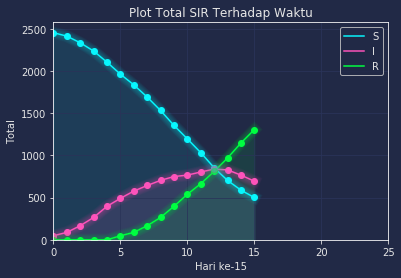

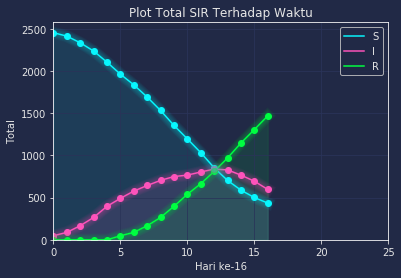

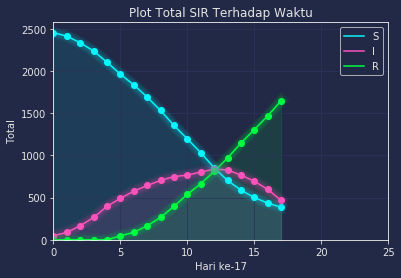

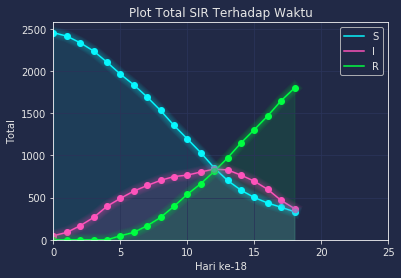

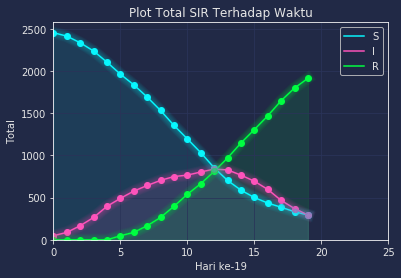

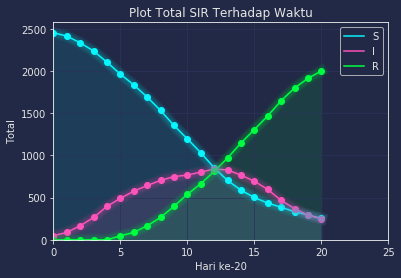

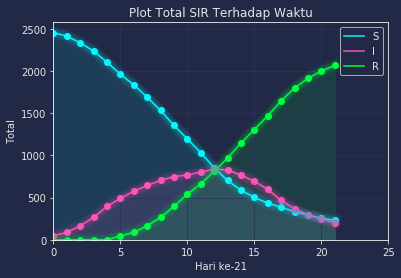

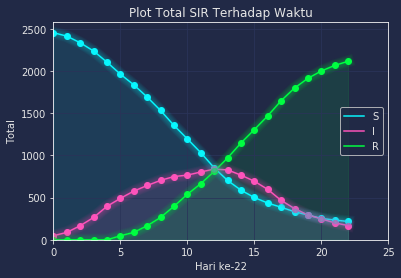

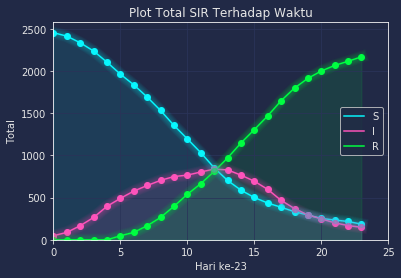

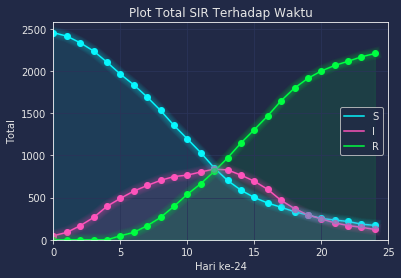

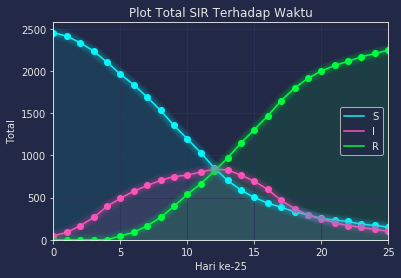

In [61]:
plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

# Palette neon    
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#00ff41',  # matrix green
#     '#F5D300',  # yellow
]

# Palette Heatmap
# colors = [
#     '#2266E7', '#E72822', '#34E722'
# ]

for i in range(df_SIR.shape[0]):
    fig, ax = plt.subplots()
    df = df_SIR.iloc[:i+1]
    df.plot(marker='o', color=colors, ax=ax)
    # Redraw the data with low alpha and slighty increased linewidth:
    n_shades = 10
    diff_linewidth = 1.05
    alpha_value = 0.3 / n_shades
    for n in range(1, n_shades+1):
        df.plot(marker='o',
                linewidth=2+(diff_linewidth*n),
                alpha=alpha_value,
                legend=False,
                ax=ax,
                color=colors)
    # Color the areas below the lines:
    for column, color in zip(df, colors):
        ax.fill_between(x=df.index,
                        y1=df[column].values,
                        y2=[0] * len(df),
                        color=color,
                        alpha=0.1)
    ax.grid(color='#2A3459')
    ax.set_xlim([0, iteration])  # to not have the markers cut off
    ax.set_ylim(0)
    ax.set_title("Plot Total SIR Terhadap Waktu")
    ax.set_xlabel("Hari ke-{}".format(i))
    ax.set_ylabel("Total")
    plt.savefig(f'foto/SIR_t-{i}')